In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

%matplotlib inline 
sns.set(style="ticks")

In [0]:
url = 'https://raw.githubusercontent.com/Smet1/bmstu_ml/master/lab3/data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [32]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [33]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 18207 строк и 89 столбца.


## 1. Обработка пропусков в данных

In [34]:
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

Club - 241 - 1.324. Тип - object
Preferred Foot - 48 - 0.264. Тип - object
International Reputation - 48 - 0.264. Тип - float64
Weak Foot - 48 - 0.264. Тип - float64
Skill Moves - 48 - 0.264. Тип - float64
Work Rate - 48 - 0.264. Тип - object
Body Type - 48 - 0.264. Тип - object
Real Face - 48 - 0.264. Тип - object
Position - 60 - 0.33. Тип - object
Jersey Number - 60 - 0.33. Тип - float64
Joined - 1553 - 8.53. Тип - object
Loaned From - 16943 - 93.058. Тип - object
Contract Valid Until - 289 - 1.587. Тип - object
Height - 48 - 0.264. Тип - object
Weight - 48 - 0.264. Тип - object
LS - 2085 - 11.452. Тип - object
ST - 2085 - 11.452. Тип - object
RS - 2085 - 11.452. Тип - object
LW - 2085 - 11.452. Тип - object
LF - 2085 - 11.452. Тип - object
CF - 2085 - 11.452. Тип - object
RF - 2085 - 11.452. Тип - object
RW - 2085 - 11.452. Тип - object
LAM - 2085 - 11.452. Тип - object
CAM - 2085 - 11.452. Тип - object
RAM - 2085 - 11.452. Тип - object
LM - 2085 - 11.452. Тип - object
LCM - 2085 - 

### 1.1 Удаление пустых значений

In [0]:
df = df[df['Club'].notna()]

# удаление столбца
df.drop(columns=['Loaned From'], inplace=True)

In [36]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 17966 строк и 88 столбца.


### 1.2 Заполнение нулями

In [37]:
df['FKAccuracy'] = df['FKAccuracy'].fillna(0)

df[df['FKAccuracy'].isnull()].shape

(0, 88)

### 1.3 Внедрение значений в числовых данных

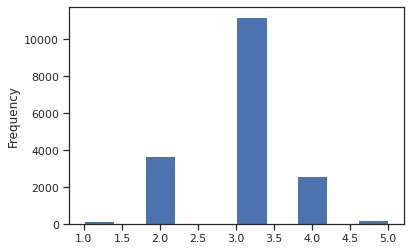

In [44]:
df['Weak Foot'].plot.hist()

In [45]:
df['Weak Foot'].describe()

count    17918.000000
mean         2.947260
std          0.660106
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Weak Foot, dtype: float64

In [46]:
mode = df['Weak Foot'].mode()[0]
(df[df['Weak Foot'] == mode].shape[0]/row_number) * 100

62.34554157853724

In [47]:
median = df['Weak Foot'].describe()['50%']
(df[df['Weak Foot'] == median].shape[0]/row_number) * 100

62.34554157853724

In [0]:
imp = SimpleImputer(strategy='most_frequent')
df['Weak Foot'] = imp.fit_transform(df[['Weak Foot']])

In [50]:
df[df['Weak Foot'].isnull()].shape

(0, 88)

### 1.4 Внедрение значений в категориальных данных

In [0]:
imp = SimpleImputer(strategy='most_frequent')
df['Stamina'] = imp.fit_transform(df[['Stamina']])

In [43]:
df[df['Stamina'].isnull()].shape

(0, 88)

## 2. Кодирование категориальных признаков

In [56]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

Name
Photo
Nationality
Flag
Club
Club Logo
Value
Wage
Preferred Foot
Work Rate
Body Type
Real Face
Position
Joined
Contract Valid Until
Height
Weight
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
Release Clause


### 2.1 Кодирование категорий целочисленными значениями

In [64]:
df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [0]:
le = LabelEncoder()
df['Club_LabelEncoder'] = le.fit_transform(df['Club'])

In [79]:
df['Club_LabelEncoder'].unique()

array([212, 326, 435, 375, 374, 134, 470,  61, 214, 583, 363, 398,  52,
       382, 315, 351,  86, 620, 418, 482, 605, 280, 232, 234,  77, 346,
       552, 469, 419, 457,  72, 473, 619, 530, 504,  19,  17, 358,  55,
       278,  62, 456,  26, 176, 206, 633,   3, 574, 535, 412,  36, 640,
        87, 297, 511, 168,  56, 581, 377,  74, 169, 427, 616, 531, 582,
       367, 527, 401, 254, 428, 359, 260, 630,  58, 390, 264, 250, 495,
       368, 514,  34, 612, 488, 480, 182, 198, 272, 281, 100, 566, 544,
       577, 268,  73, 391, 137, 267, 450, 580, 459, 293, 121, 136, 173,
       513, 195, 524, 316,  46, 312,  82, 167,   7,  89, 549, 462, 211,
       252, 230, 251, 150,  95,  28, 324, 490, 425, 562, 585, 505, 449,
       417, 146, 340, 404, 259, 455, 331, 291, 561, 273, 584, 461, 303,
       117, 529, 288, 233, 478, 220, 379, 436, 213,  41,  69, 328,  35,
       564, 534, 157, 325, 632, 458, 285, 183, 185,  84, 397,  45, 131,
       147,  88, 141, 595, 475, 110, 144, 127, 623, 224, 591, 18

In [81]:
le.inverse_transform([212, 305])

array(['FC Barcelona', 'IF Brommapojkarna'], dtype=object)

In [83]:
df[['Club','Club_LabelEncoder']].head()

,Club,Club_LabelEncoder
0,FC Barcelona,212
1,Juventus,326
2,Paris Saint-Germain,435
3,Manchester United,375
4,Manchester City,374


### 2.2. Кодирование категорий наборами бинарных значений

In [94]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [99]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Position'] = imp2.fit_transform(df[['Position']])

df['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 17966, dtype: object

In [100]:
# Пустые значения отсутствуют
np.unique(df['Position'])

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [0]:
ohe = OneHotEncoder()
transformed_data = ohe.fit_transform(df[['Position']])

In [102]:
transformed_data.shape

(17966, 27)

In [103]:
transformed_data.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1

### 2.3 Pandas get_dummies

In [104]:
pd.get_dummies(df['Position']).head()

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [105]:
pd.get_dummies(df['Position'], dummy_na=True).head()

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## 3. Масштабирование данных

### 3.1 MinMax масштабирование

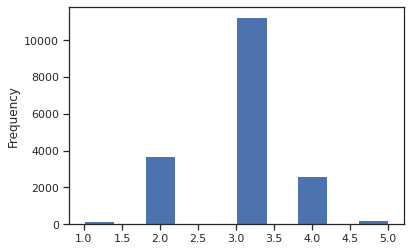

In [106]:
df['Weak Foot'].plot.hist()

In [0]:
sc1 = MinMaxScaler()
df['Weak Foot'] = sc1.fit_transform(df[['Weak Foot']])

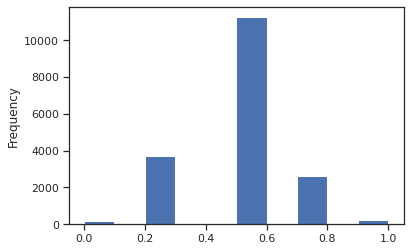

In [109]:
df['Weak Foot'].plot.hist()

### 3.2 Масштабирование данных на основе Z-оценки

In [0]:
sc2 = StandardScaler()
df['Weak Foot Z'] = sc2.fit_transform(df[['Weak Foot']])

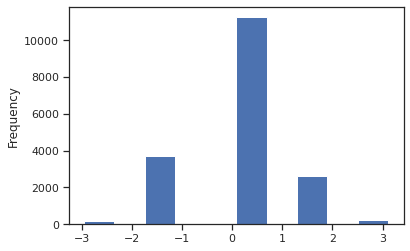

In [113]:
df['Weak Foot Z'].plot.hist()

### 3.3 Нормализация данных

In [0]:
sc3 = Normalizer()
df['Weak Foot Norm'] = sc3.fit_transform(df[['Weak Foot Z']])

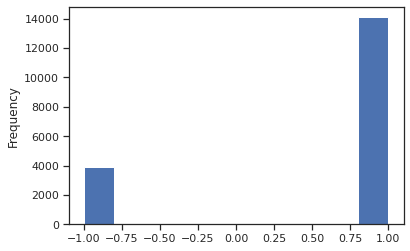

In [115]:
df['Weak Foot Norm'].plot.hist()